In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./input/CRISPR-features.csv")

In [3]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')] # eliminate unnamed columns (at the end)
df.set_index('Feature', inplace=True)

df.head()

,sgRNAScorer 2 on Xu,sgRNAScorer 2 on Doench,SSC on Xu,SSC on Doench,ChopChop XU on Xu,ChopChop XU on Doench,ChopChop DOENCH on Xu,ChopChop DOENCH on Doench,ChopChop MORENO on Xu,ChopChop MORENO on Doench,TUSCAN-Class on Xu,TUSCAN-Class on Doench,TUSCAN-Reg on Xu,TUSCAN-Reg on Doench,WuCrispr on Xu,WuCrispr on Doench
Feature,,,,,,,,,,,,,,,,
gc,-,-,-,-,NaN,NaN,MED,MED/N,NaN,NaN,Y,MED/Y,Y,Y,NaN,NaN
-4A,-,-,-,-,-,-,-,-,-,-,NaN,NaN,NaN,NaN,-,-
-4C,-,-,-,-,-,-,-,-,-,-,NaN,NaN,NaN,NaN,-,-
-4G,-,-,-,-,-,-,-,-,-,-,NaN,NaN,NaN,NaN,-,-
-4T,-,-,-,-,-,-,-,-,-,-,NaN,NaN,NaN,NaN,-,-


# Changing values to numeric 

In [4]:
df = df.fillna(0) # feature not important enough 
df = df.replace('-',0) # feature not considered 
df = df.replace('?',0) # feature not clear

df = df.replace('Y',1) # high value associated with positive impact
df = df.replace('N',-1) # high value associated with negative impact
df = df.replace('MED',0) # medium values are positive impact (high values are 0)
df = df.replace('MED/Y',0.5) # medium-high values are positive impact
df = df.replace('MED/N',-0.5) # medium-low values are positive impact

In [5]:
set(df.values.flatten())

{-1.0, -0.5, 0.0, 0.5, 1.0}

In [6]:
df

,sgRNAScorer 2 on Xu,sgRNAScorer 2 on Doench,SSC on Xu,SSC on Doench,ChopChop XU on Xu,ChopChop XU on Doench,ChopChop DOENCH on Xu,ChopChop DOENCH on Doench,ChopChop MORENO on Xu,ChopChop MORENO on Doench,TUSCAN-Class on Xu,TUSCAN-Class on Doench,TUSCAN-Reg on Xu,TUSCAN-Reg on Doench,WuCrispr on Xu,WuCrispr on Doench
Feature,,,,,,,,,,,,,,,,
gc,0,0,0,0,0,0,0,-0.5,0,0,1,0.5,1,1,0,0
-4A,0,0,0,0,0,0,0,0.0,0,0,0,0.0,0,0,0,0
-4C,0,0,0,0,0,0,0,0.0,0,0,0,0.0,0,0,0,0
-4G,0,0,0,0,0,0,0,0.0,0,0,0,0.0,0,0,0,0
-4T,0,0,0,0,0,0,0,0.0,0,0,0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
align 52,0,0,0,0,0,0,0,0.0,0,0,0,0.0,0,0,-1,0
dG fold,0,0,0,0,0,0,0,0.0,0,0,0,0.0,0,0,1,1
#GCC,0,0,0,0,0,0,0,0.0,0,0,0,0.0,0,0,-1,-1


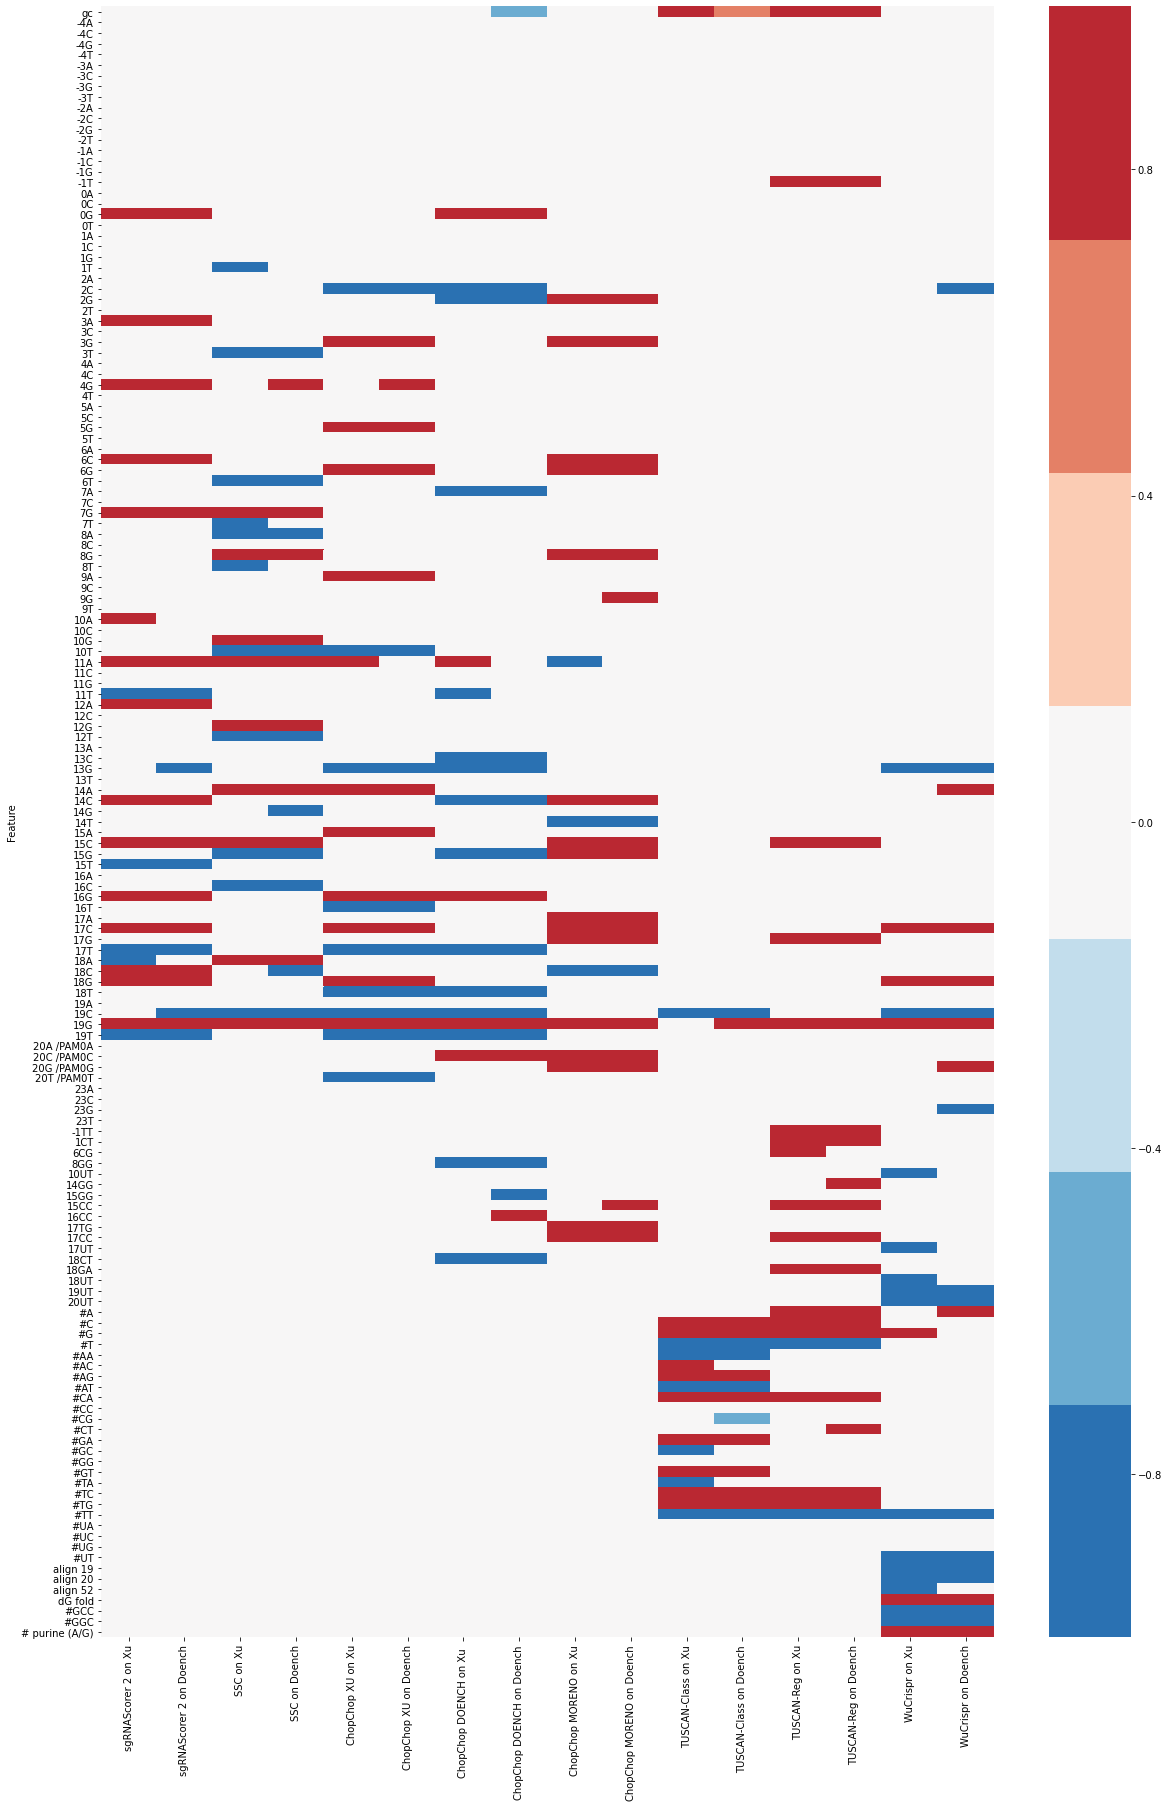

In [7]:
plt.figure(figsize=(20,30))
ax = sns.heatmap(df, vmin=-1, vmax=1, cmap=sns.color_palette("RdBu_r", 7))
plt.savefig('./plots/heatmap.png')
plt.show()